[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier–Stokes
=====
***

You should have completed your own code for [Step 5](./07_Step_5.ipynb) before continuing to this lesson. As with Steps 1 to 4, we will build incrementally, so it's important to complete the previous step!

We continue ...

Step 6: 2-D Convection
----
***

Now we solve 2D Convection, represented by the pair of coupled partial differential equations below:  

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizing these equations using the methods we've applied previously yields:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Rearranging both equations, we solve for $u_{i,j}^{n+1}$ and $v_{i,j}^{n+1}$, respectively.  Note that these equations are also coupled.  

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

### Initial Conditions

The initial conditions are the same that we used for 1D convection, applied in both the x and y directions.  

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{for } x,y \in (0.5, 1)\times(0.5,1) \cr
1 & \text{everywhere else}
\end{matrix}\end{cases}$$

### Boundary Conditions

The boundary conditions hold u and v equal to 1 along the boundaries of the grid
.

$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

In [1]:
import numpy
from matplotlib import pyplot, cm
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
###variable declarations
nx = 41
ny = 41
nt = 50
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
dt = dx * 0.2

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
v = numpy.ones((ny, nx))

###Assign initial conditions
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

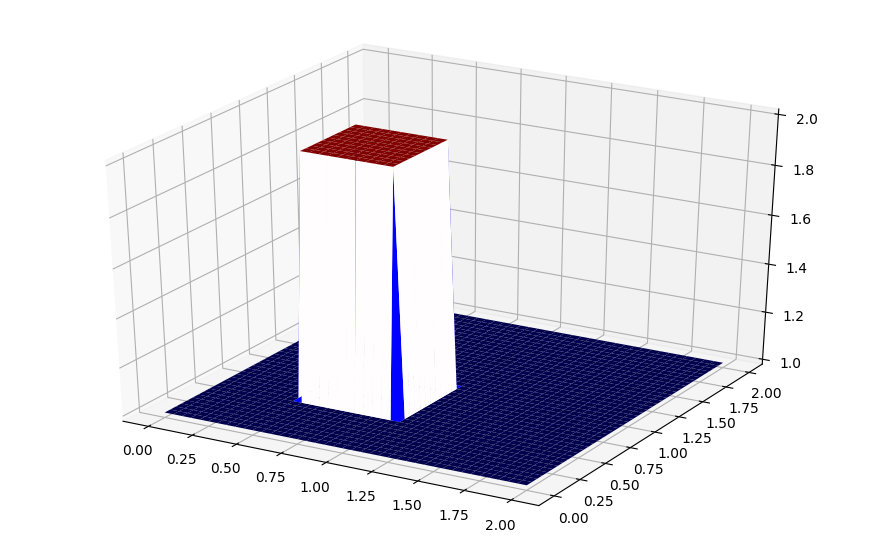

In [3]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
ax.set_zlim3d(1,2)
X, Y = numpy.meshgrid(x, y)                            
surf = [ax.plot_surface(X, Y, u[:], cmap=cm.seismic)]

In [4]:
def convection(n, u, u_old, v, v_old, surf):
    u_old = u.copy()
    v_old = v.copy()
    u[1:, 1:] = (u_old[1:, 1:] - 
                 (u_old[1:, 1:] * dt / dx * (u_old[1:, 1:] - u_old[1:, :-1])) -
                  v_old[1:, 1:] * dt / dy * (u_old[1:, 1:] - u_old[:-1, 1:]))
    v[1:, 1:] = (v_old[1:, 1:] -
                 (u_old[1:, 1:] * dt / dx * (v_old[1:, 1:] - v_old[1:, :-1])) -
                 v_old[1:, 1:] * dt / dy * (v_old[1:, 1:] - v_old[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    surf[0].remove()
    surf[0] = ax.plot_surface(X, Y, u[:], cmap=cm.seismic)

u_old = u
v_old = v
anim = animation.FuncAnimation(fig, convection, fargs=(u,u_old,v,v_old,surf), frames=nt, interval=50)
HTML(anim.to_html5_video())

## Learn More

The video lesson that walks you through the details for Steps 5 to 8 is **Video Lesson 6** on You Tube:

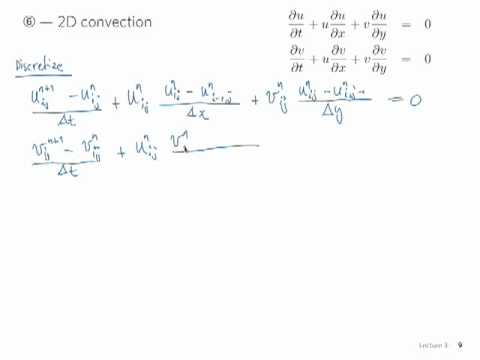

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [6]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: '../styles/custom.css'

> (The cell above executes the style for this notebook.)